In [1]:
import os
from pathlib import Path
from joblib import Parallel, delayed
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import stats

import sys
sys.path.append("../")


from market.impute import imputer_factory, ImputationMethod
from common.log import create_logger
from market.task import MaximumLikelihoodLinearRegression, BayesianLinearRegression, GaussianProcessLinearRegression

sample_size = 1000
test_frac = 0.04
test_idx = int(sample_size * (1 - test_frac))
noise_variance = 1.2
num_samples = 100
regularization = 1e-5
coeffs = np.array([0, 0.9, 0.9, -0.9])
num_feats = len(coeffs)

missing_probs = np.array([0, 0, 0, 0.5])

rho = 0.6
X = np.random.multivariate_normal(
    [0, 0, 0], [[1, 0, 0], [0, 1, rho], [0, rho, 1]], size=sample_size
)
X = np.column_stack((np.ones(len(X)).reshape(-1, 1), X))
y = (
    (X * coeffs).sum(axis=1)
    + np.random.normal(0, noise_variance**0.5, size=sample_size)
).reshape(-1, 1)

X_train, X_test = X[:test_idx], X[test_idx:]
y_train, y_test = y[:test_idx], y[test_idx:]


In [3]:
import numpy as np

a = np.eye(3)

if a is None or np.count_nonzero(a) == 0:
    print(1)
else:
    print(2)

2


In [5]:
tuple(range(4))

(0, 1, 2, 3)

In [30]:
a = [-4, 11, 22]

In [31]:
np.maximum(a, 0)

array([ 0, 11, 22])

In [13]:
a = np.ones((10, 1))

np.column_stack((a, a, np.empty((10, 1))))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [25]:
max(set(np.arange(0) + 1), default=0)

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


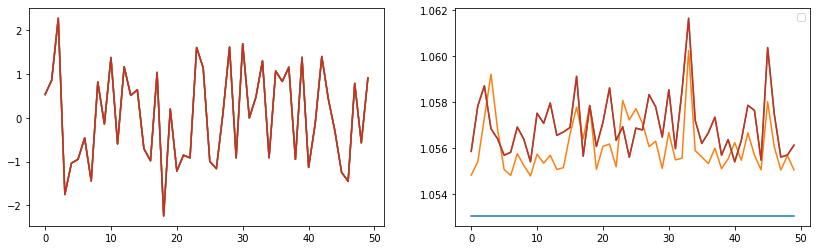

In [4]:
mle = MaximumLikelihoodLinearRegression()

blr = BayesianLinearRegression()
gpr = GaussianProcessLinearRegression()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

indices = np.arange(X_train.shape[1])

mle.fit(X_train, y_train, indices=indices)
pred_mean, pred_variance = mle.predict(X_train, indices=indices)
ax1.plot(pred_mean[:50], label="mle")
ax2.plot(pred_variance[:50])
plt.ticklabel_format(useOffset=False)



blr.fit(X_train, y_train, indices=indices)
pred_mean, pred_variance = blr.predict(X_train, indices=indices)
ax1.plot(pred_mean[:50], label="blr")
ax2.plot(pred_variance[:50])


gpr.fit(X_train, y_train, indices=indices, n_restarts_optimizer=10)
pred_mean, pred_variance = gpr.predict(X_train, indices=indices)
ax1.plot(pred_mean[:50], label="gpr")
ax2.plot(pred_variance[:50])

pred_mean, pred_variance = gpr.predict(X_train, indices=indices,X_query_covariance=np.stack([np.eye(4)*0 for i in range(len(X_train))]).reshape(-1, 4, 4))
ax1.plot(pred_mean[:50], label="gpr-noise")
ax2.plot(pred_variance[:50])

plt.legend()